# Imports: packages and data

In [118]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [119]:
# import the train data
df_train = pd.read_csv("data/technical/sales_train.csv")

Place for methods to enhance readability

In [120]:
# method to pretty print the probabilities as fixed percetage
def percent(float):
    return '{:.2%}'.format(float)

# Get a feeling for the train data

In [121]:
df_train.columns


Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [122]:
df_train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [123]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


# Analyze the Label: `item_cnt_day`

The final label is going to be the items sold in a month. Therefore, the sum
of the daily sales.


<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

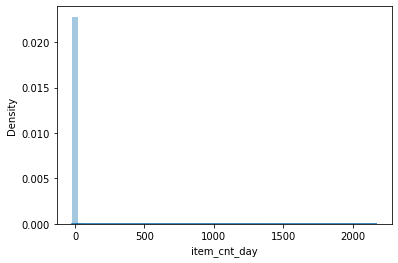

In [124]:
sns.distplot(df_train['item_cnt_day'])

This was not very convincing. Now analyzing how many times an item has been
sold at least twice in one shop on a single day. The idea is to isolate bulk
purchases and detect edge cases.


In [125]:
# get the amount of entry points
total_items_sold_regrouped_per_day = df_train.shape[0]
print(f"{total_items_sold_regrouped_per_day} - Total amount of sales"
      f" regarding exclusive items as well as exclusive days")

# count how many times an item has been sold once and only once within a day
amount_of_single_items_sold_in_a_day = \
    df_train[df_train.item_cnt_day == 1].shape[0]

# create a new frame with said data
df_how_many_items_were_sold_in_bulk = df_train[df_train.item_cnt_day != 1]

# count its occurrences
how_many_items_were_sold_in_bulk = df_how_many_items_were_sold_in_bulk.shape[0]
# calculate the share in comparison to the entire dataset
how_many_items_were_sold_in_bulk_share = \
    how_many_items_were_sold_in_bulk / amount_of_single_items_sold_in_a_day

# print the results
print(f"{how_many_items_were_sold_in_bulk} "
      f"({percent(how_many_items_were_sold_in_bulk_share)})"
      f" - This many times an item has been sold more than once.")


2935849 - Total amount of sales regarding exclusive items as well as exclusive days
306477 (11.66%) - This many times an item has been sold more than once.


Get a fresh overview

In [126]:
df_how_many_items_were_sold_in_bulk.item_cnt_day.describe()

count    306477.000000
mean          3.324341
std           7.801254
min         -22.000000
25%           2.000000
50%           2.000000
75%           3.000000
max        2169.000000
Name: item_cnt_day, dtype: float64

<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

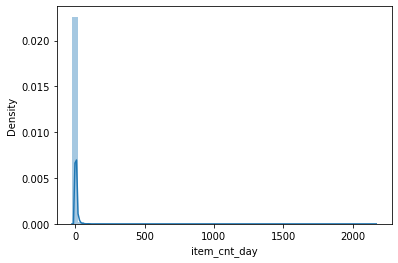

In [127]:
sns.distplot(df_how_many_items_were_sold_in_bulk['item_cnt_day'])

A bit more gets visible now... still not satisfying.

### Overview of the sold item counters with a negative value

Let's look at why and how many items are being counted negatively and as well
as the spikes.

In [128]:
df_negative_counted_item_cnt_day = \
    df_how_many_items_were_sold_in_bulk[ \
        df_how_many_items_were_sold_in_bulk.item_cnt_day < 1]

df_negative_counted_item_cnt_day.describe()


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,7356.00000,7356.000000,7356.000000,7356.000000,7356.000000
mean,14.63037,32.514546,8982.021207,1442.945623,-1.025150
std,9.43772,16.825725,6166.315366,2419.680132,0.368794
min,0.00000,2.000000,28.000000,0.500000,-22.000000
25%,7.00000,19.000000,3734.000000,349.000000,-1.000000
50%,13.00000,31.000000,6927.000000,799.000000,-1.000000
75%,23.00000,47.000000,14056.000000,1699.000000,-1.000000
max,33.00000,59.000000,22167.000000,33490.000000,-1.000000


### Now the spikes

In [129]:
df_spikes_counted_item_cnt_day = \
    df_how_many_items_were_sold_in_bulk[ \
        df_how_many_items_were_sold_in_bulk.item_cnt_day > 4]

df_spikes_counted_item_cnt_day.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,37885.000000,37885.000000,37885.000000,37885.000000,37885.000000
mean,15.442418,31.979359,12301.041019,1075.346719,11.011825
std,9.007446,15.545587,7575.366838,2322.265552,20.498457
min,0.000000,0.000000,30.000000,0.100000,5.000000
25%,8.000000,22.000000,4271.000000,5.000000,5.000000
50%,14.000000,30.000000,11534.000000,399.000000,7.000000
75%,22.000000,45.000000,20949.000000,1199.900000,11.000000
max,33.000000,59.000000,22167.000000,31599.000000,2169.000000


<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

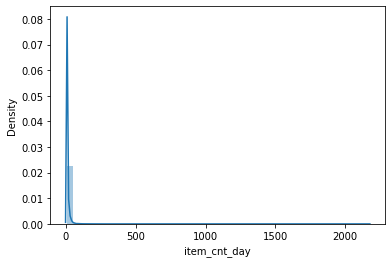

In [130]:
sns.distplot(df_spikes_counted_item_cnt_day['item_cnt_day'])